# Plot slice variable

### David O. Lignell, May 21, 2020.

Driver for the [get_var_slice.py](get_var_slice.py) function, which calls and extends the [slread.py](slread.py) script. The slread.py script reads a given slice file. This will be for a particular mesh, for a particular variable. The get_var_slice.py script provides a simple interface that will read all mesh files for a given variable for a given slice and combine them into a single variable for easy plotting or analysis. This is convenient for computing average or fluctuating fields, or otherwise processing the data contained in a slice. The interface requires minimal information from the user and reads the FDS input file to gather required information.

This Jupyter notebook calls get_var_slice and plots the last frame along with the simple average of all frames.

A complete case setup is available on [Github](https://github.com/BYUignite/fds_read_slice)

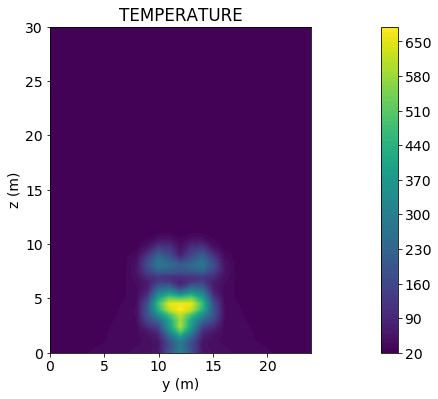

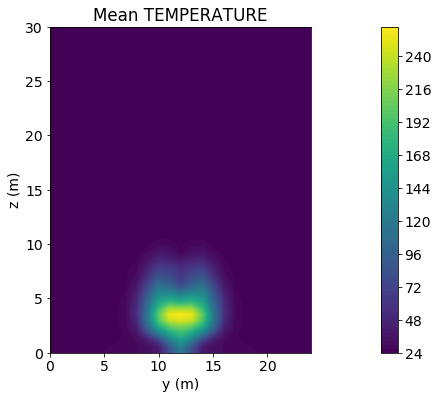

In [2]:
from get_var_slice import get_var_slice
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#------------------------------

inputFile = "case.fds"
varName = "TEMPERATURE"
pnumber = 2
gskip = 1
tskip = 1

V, X, Y, pdir = get_var_slice(inputFile, varName, pnumber, gskip, tskip)
    
xlabel = 'y (m)' if pdir=='X' else 'x (m)' if pdir=='Y' else 'x (m)'
ylabel = 'z (m)' if pdir=='X' else 'z (m)' if pdir=='Y' else 'y (m)'
        
#---------- plot results
    
plt.rc('font', size=14)
    
plt.figure(figsize=(8,6))
plt.contourf(X,Y, V[:,:,-1], 80)
plt.colorbar()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.axis('scaled')
plt.title(varName)
    
nx,ny,nt = np.shape(V)
Vavg = np.zeros((nx,ny))
for it in range(nt):
    Vavg += V[:,:,it]
Vavg /= nt
    
plt.figure(figsize=(8,6))
plt.contourf(X,Y,Vavg, 80)
plt.colorbar()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.axis('scaled')    
plt.title(f"Mean {varName}");
